In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from numpy import mean
from socket import socket
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV


In [341]:
data = pd.read_csv('modeling_data.csv')
data = data.drop(data.columns[0], axis=1)
data.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range,...,years_of_credit_history,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other
0,5000.0,36,0.1065,10.0,24000.0,1,1,27.65,0.0,735.0,...,26.9,0,0,0,1,1,0,0,0,0
1,2500.0,60,0.1527,0.0,30000.0,1,0,1.00,0.0,740.0,...,12.7,0,0,0,1,0,0,0,0,1
2,2400.0,36,0.1596,10.0,24000.0,0,1,8.72,0.0,735.0,...,10.1,0,0,0,1,0,0,0,0,1
3,10000.0,36,0.1349,10.0,49200.0,1,1,20.00,0.0,690.0,...,15.8,0,0,0,1,0,0,0,0,1
4,3000.0,60,0.1269,1.0,80000.0,1,1,17.94,0.0,695.0,...,15.9,0,0,0,1,0,0,0,0,1


In [342]:
X = data.drop('loan_status',axis =1)
y = data['loan_status']

In [343]:
## wykonanie standaryzacji 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [344]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,dti,delinq_2yrs,fico_range,inq_last_6mths,...,years_of_credit_history,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other
0,-0.891699,-0.606139,-0.373734,1.355254,-1.295802,0.860477,2.146113,-0.349008,0.600346,0.158815,...,2.213023,-0.895353,-0.050448,-0.288856,1.050274,2.597111,-0.940584,-0.284802,-0.241236,-0.610405
1,-1.263575,1.649787,0.931412,-1.416519,-1.107938,0.860477,-1.844474,-0.349008,0.746837,2.185639,...,-0.144502,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258
2,-1.278450,-0.606139,1.126336,1.355254,-1.295802,-1.162147,-0.688476,-0.349008,0.600346,1.172227,...,-0.576162,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258
3,-0.147948,-0.606139,0.428563,1.355254,-0.506776,0.860477,1.000597,-0.349008,-0.718073,0.158815,...,0.370169,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258
4,-1.189200,1.649787,0.202564,-1.139342,0.457589,0.860477,0.692132,-0.349008,-0.571582,-0.854597,...,0.386771,-0.895353,-0.050448,-0.288856,1.050274,-0.385043,-0.940584,-0.284802,-0.241236,1.638258


<Axes: >

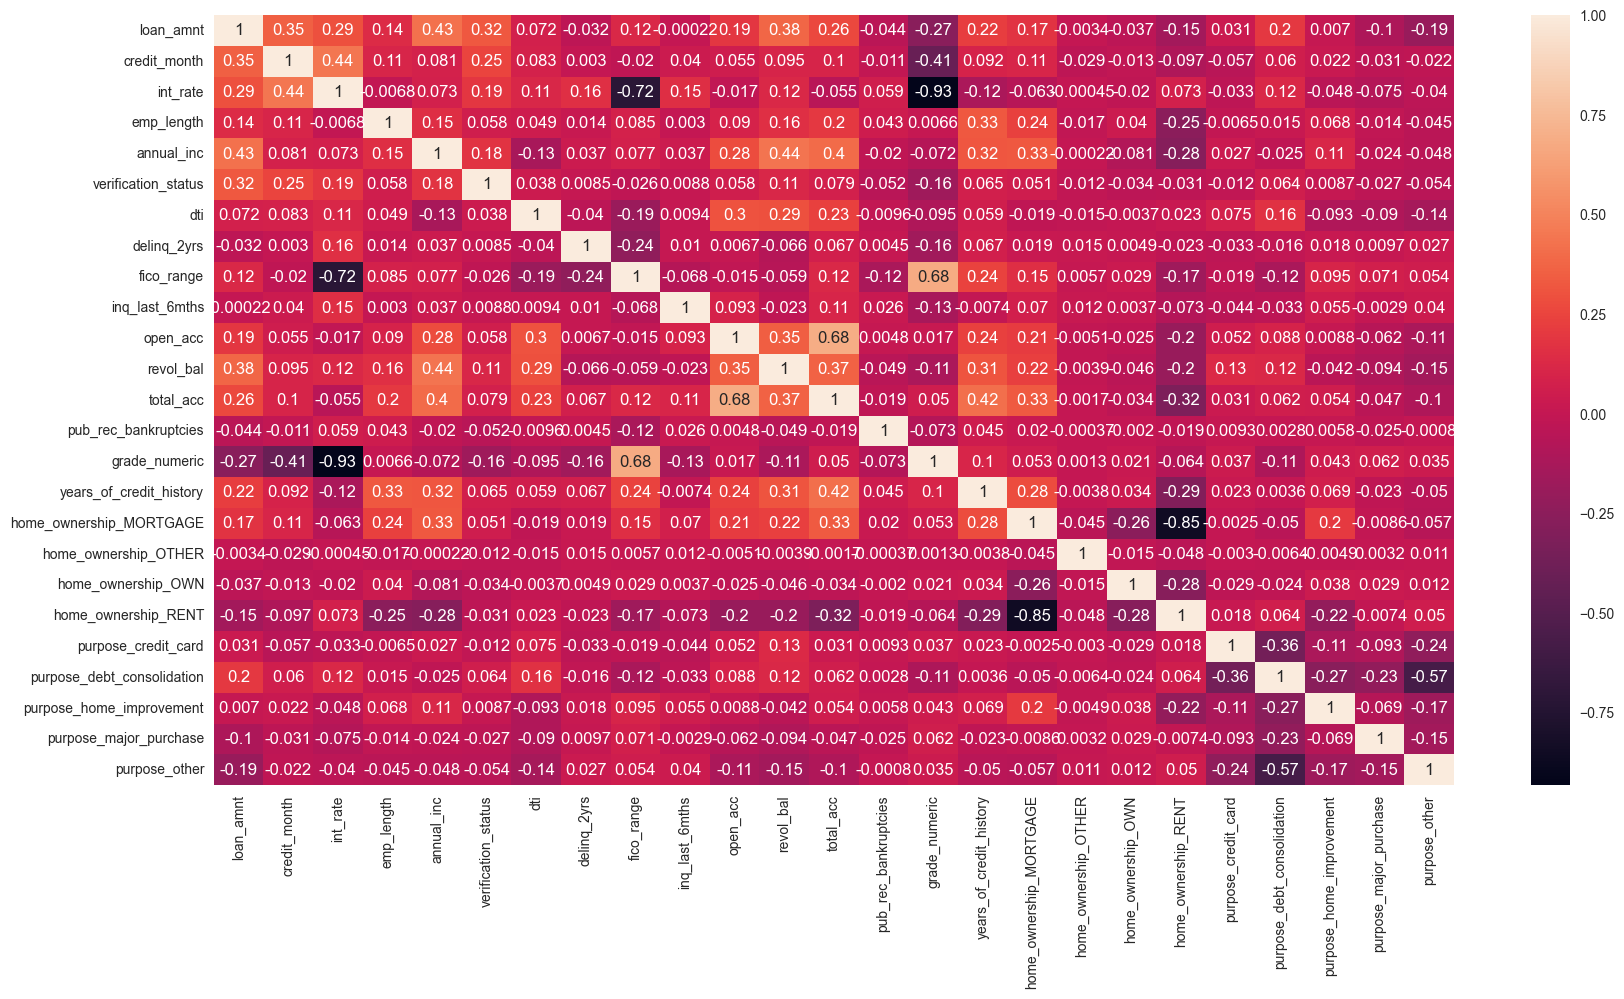

In [345]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

Klasteryzacja

K-mean

In [346]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_scaled_df)

C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=5)

C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

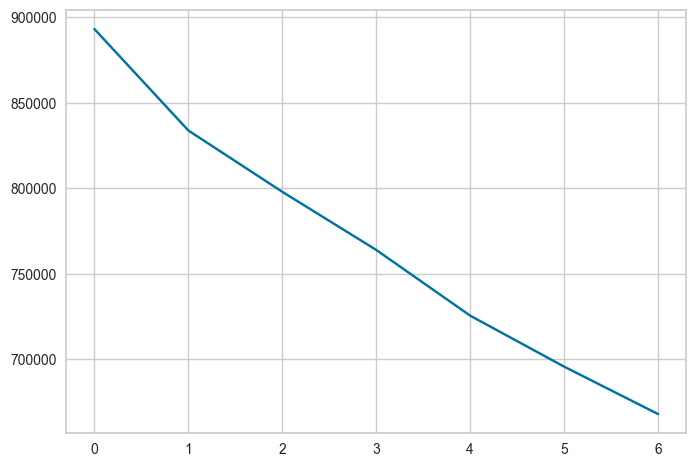

In [347]:
# metoda łokcia - elbow-curve
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled_df)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [349]:
# Miara wewnętrzna - wskaźnik sylwetkowy
# średnią odległość pomiędzy obserwacjami wewnątrz grupy (a) i średnią odległość obserwacji do najbliższej „obcej” grupy (b). 
# Silhouette obliczany jest dla każdej obserwacji w następujący sposób: (a – b)/max(a, b)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.10755746716484973


C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.10018827823747739


C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.10524969131933698


C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.10742451666808642


C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.10422007412825765


C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.10716013157091318


C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.11715950622307061


Najlepszy wynik dla 4 i 8 klastrów, sprawdzamy 4.

In [350]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X)

C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [351]:
data['K-Means_Cluster_ID'] = kmeans.labels_
data.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range,...,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,K-Means_Cluster_ID
0,5000.0,36,0.1065,10.0,24000.0,1,1,27.65,0.0,735.0,...,0,0,0,1,1,0,0,0,0,3
1,2500.0,60,0.1527,0.0,30000.0,1,0,1.00,0.0,740.0,...,0,0,0,1,0,0,0,0,1,3
2,2400.0,36,0.1596,10.0,24000.0,0,1,8.72,0.0,735.0,...,0,0,0,1,0,0,0,0,1,3
3,10000.0,36,0.1349,10.0,49200.0,1,1,20.00,0.0,690.0,...,0,0,0,1,0,0,0,0,1,0
4,3000.0,60,0.1269,1.0,80000.0,1,1,17.94,0.0,695.0,...,0,0,0,1,0,0,0,0,1,2


<Axes: xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

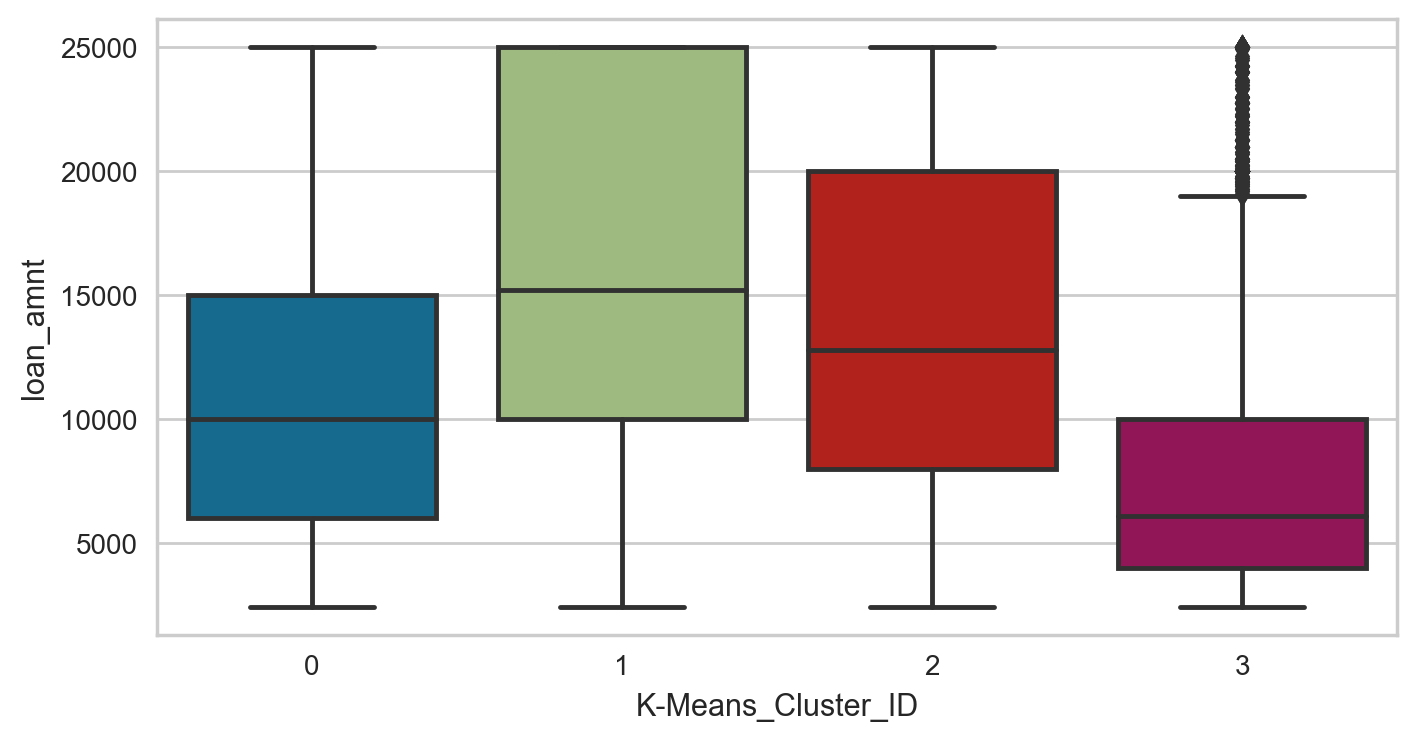

In [352]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=data)

<Axes: xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

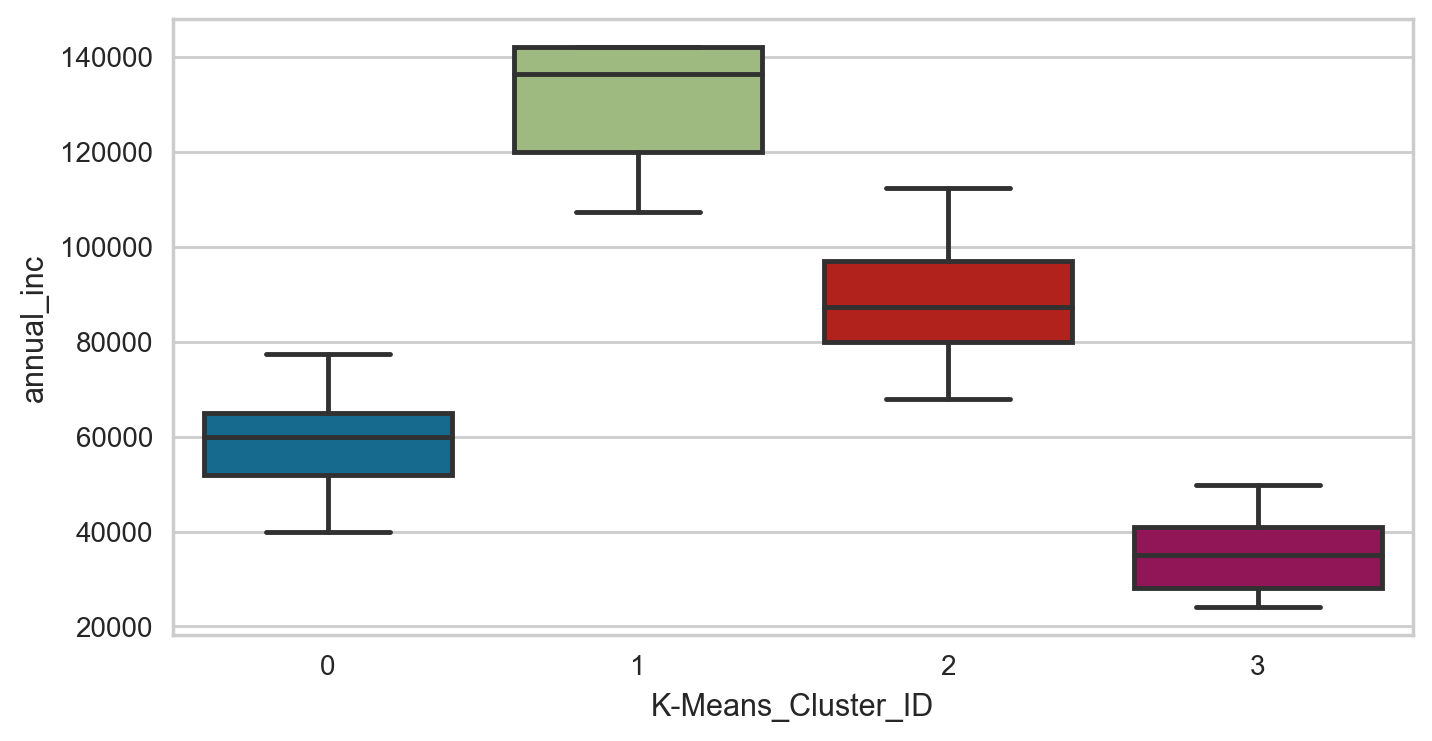

In [353]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=data)

Hierarchiczna

In [354]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')

In [ ]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')

In [355]:
#2 klastry z single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )

In [ ]:
#2 klastry z complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )

In [356]:
data["Hierarchical_Cluster_labels"] = sl_cluster_labels
data.head()

,loan_amnt,credit_month,int_rate,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,fico_range,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,5000.0,36,0.1065,10.0,24000.0,1,1,27.65,0.0,735.0,...,0,0,1,1,0,0,0,0,3,0
1,2500.0,60,0.1527,0.0,30000.0,1,0,1.00,0.0,740.0,...,0,0,1,0,0,0,0,1,3,0
2,2400.0,36,0.1596,10.0,24000.0,0,1,8.72,0.0,735.0,...,0,0,1,0,0,0,0,1,3,0
3,10000.0,36,0.1349,10.0,49200.0,1,1,20.00,0.0,690.0,...,0,0,1,0,0,0,0,1,0,0
4,3000.0,60,0.1269,1.0,80000.0,1,1,17.94,0.0,695.0,...,0,0,1,0,0,0,0,1,2,0


<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='loan_amnt'>

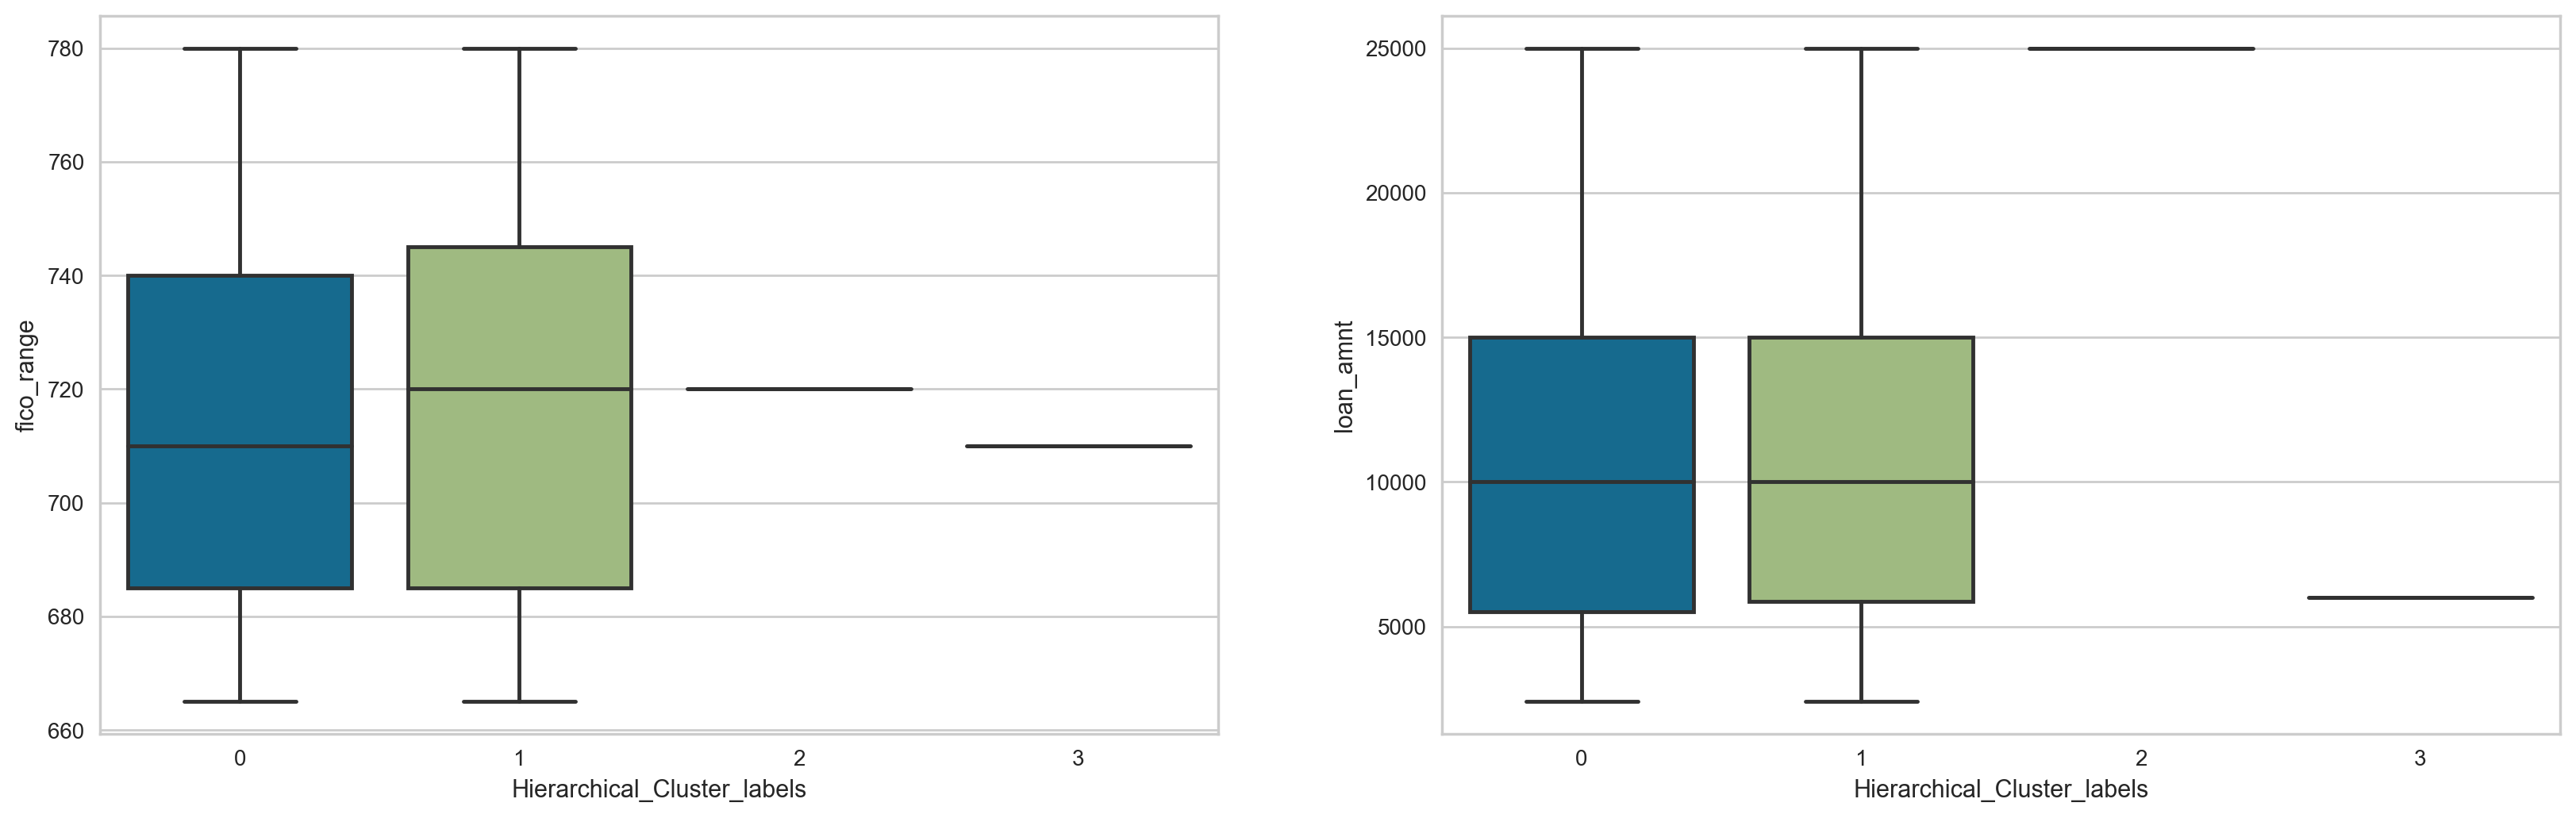

In [357]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='Hierarchical_Cluster_labels', y='fico_range', data=data)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='loan_amnt', data=data)

<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='annual_inc'>

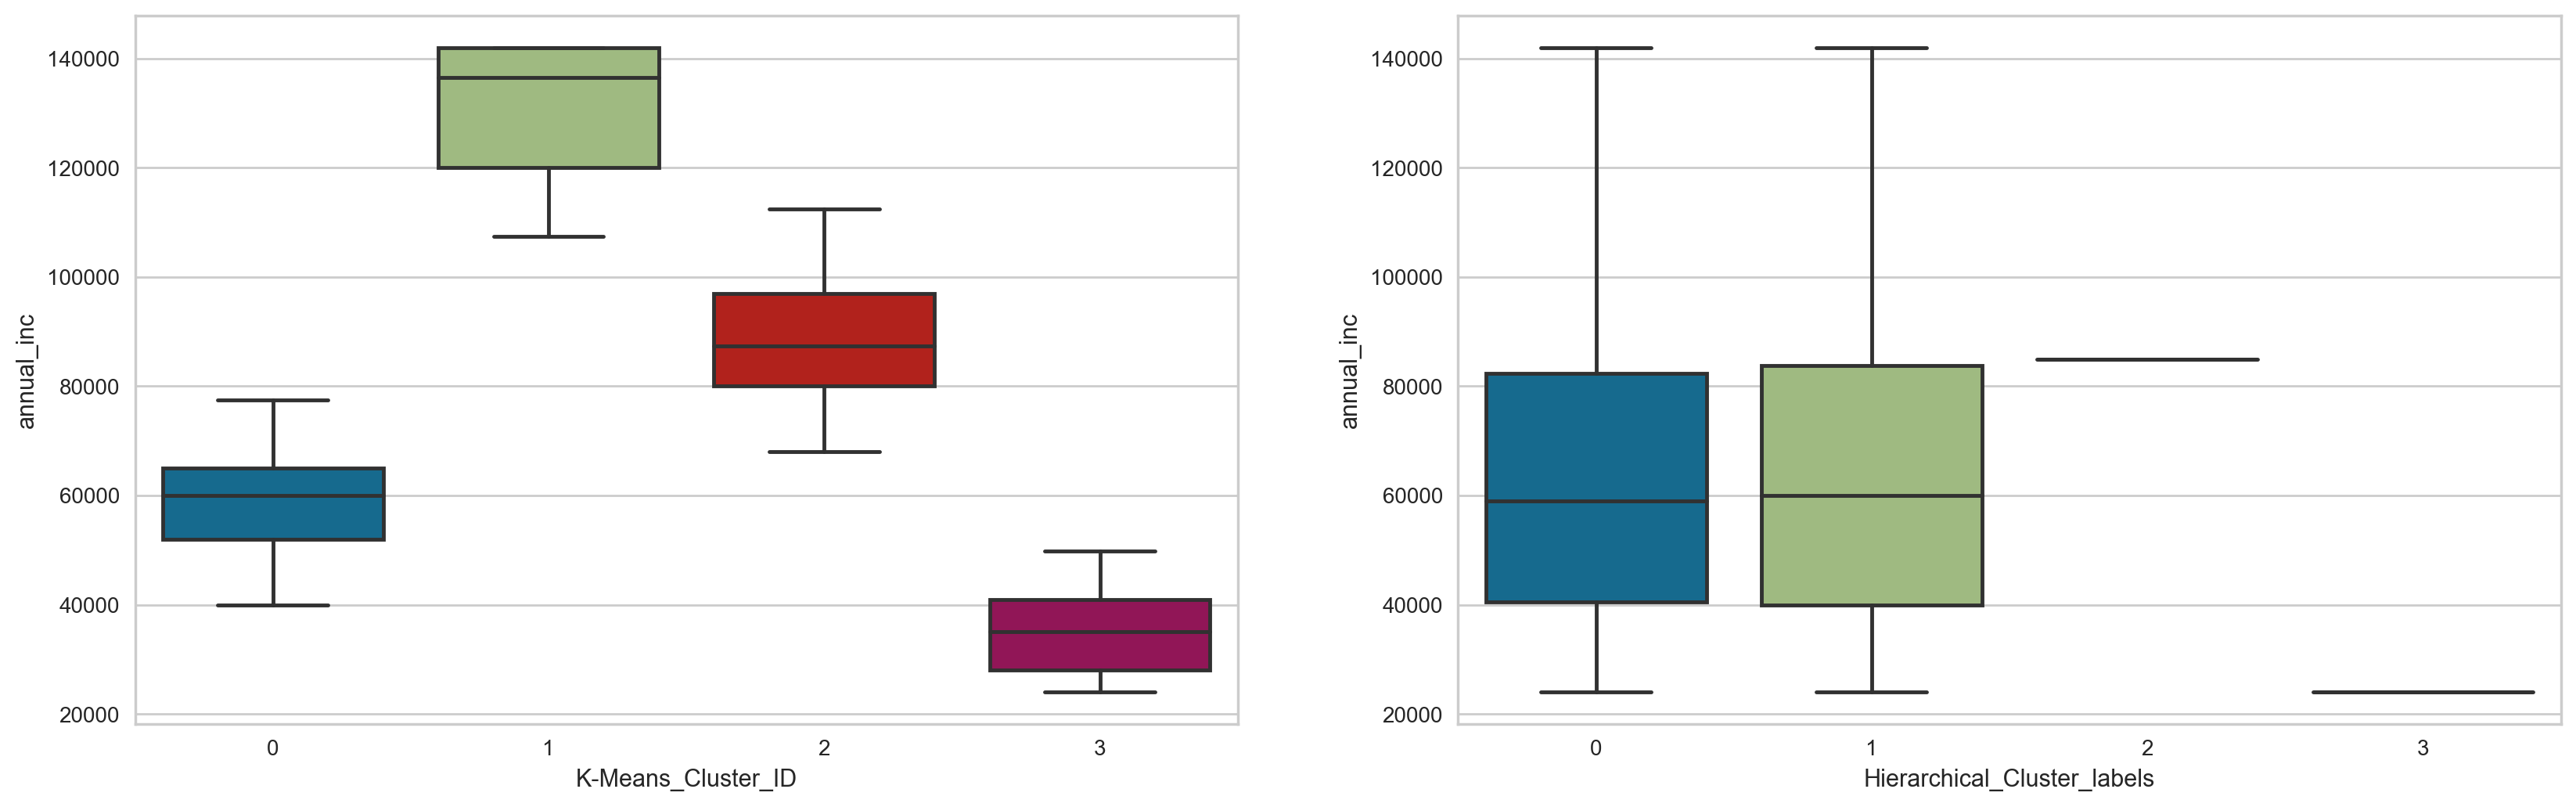

In [358]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=data)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='annual_inc', data=data)


DBScan

In [359]:
dbscan=DBSCAN()
dbscan.fit(X_scaled_df)

DBSCAN()

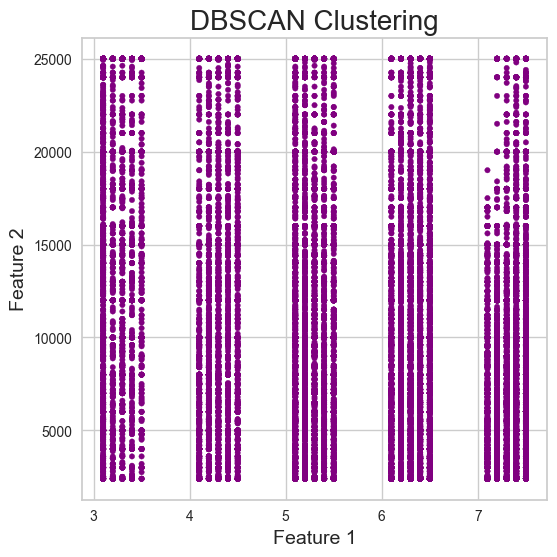

In [361]:
data['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
colors=['purple','green']
plt.figure(figsize=(6,6))
plt.scatter(data['grade_numeric'], data['loan_amnt'],c=data['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

MODELOWANIE

Wytrenowanie 6 różnych modeli

In [362]:
# Podzial danych na treningowe i testowe
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

Model 1: Drzewo decyzyjne

In [363]:
model1 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model1.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [364]:
acc_BC = model1.score(x_test, y_test)
acc_BC_t = model1.score(x_train, y_train)

In [365]:
roc_auc_score1 = metrics.roc_auc_score(y_test, model1.predict_proba(x_test)[:, 1])

In [366]:
results = pd.DataFrame({'Method':['BaggingClassifier'], 'accuracy_test': acc_BC, 'accuracy_train': acc_BC_t, 'ROC_AUC_score': roc_auc_score1})
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849


Model 2: XGBoost

In [368]:
model2 = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [369]:
acc_xgb = model2.score(x_test, y_test)
acc_xgb_t = model2.score(x_train, y_train)

In [370]:
roc_auc_score2 = metrics.roc_auc_score(y_test, model2.predict_proba(x_test)[:, 1])

In [371]:
tempResultsDf = pd.DataFrame({'Method':['XGBoost'], 'accuracy_test': acc_xgb, 'accuracy_train': acc_xgb_t, 'ROC_AUC_score': roc_auc_score2})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849
0,XGBoost,0.858244,0.857594,0.681375


Model 3: Regresja logistyczna

In [372]:
model3 = LogisticRegression(solver = 'lbfgs')
model3.fit(x_train, y_train)

LogisticRegression()

In [373]:
acc_LR = model3.score(x_test, y_test)
acc_LR_t = model3.score(x_train, y_train)

In [374]:
roc_auc_score3 = metrics.roc_auc_score(y_test, model3.predict_proba(x_test)[:, 1])

In [375]:
tempResultsDf = pd.DataFrame({'Method':['LogisticRegression'], 'accuracy_test': acc_LR, 'accuracy_train': acc_LR_t, 'ROC_AUC_score': roc_auc_score3})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849
0,XGBoost,0.858244,0.857594,0.681375
0,LogisticRegression,0.857741,0.857092,0.689967


Model 4: AdaBoost

In [376]:
model4 = AdaBoostClassifier(random_state=1)
model4.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [377]:
acc_ada = model4.score(x_test, y_test)
acc_ada_t = model4.score(x_train, y_train)

In [378]:
roc_auc_score4 = metrics.roc_auc_score(y_test, model4.predict_proba(x_test)[:, 1])

In [379]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoostClassifier'], 'accuracy_test': acc_ada, 'accuracy_train': acc_ada_t, 'ROC_AUC_score': roc_auc_score4})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849
0,XGBoost,0.858244,0.857594,0.681375
0,LogisticRegression,0.857741,0.857092,0.689967
0,AdaBoostClassifier,0.857406,0.856984,0.691030


Model 5: GradientBoosting

In [380]:
model5 = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model5.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [381]:
acc_GB = model5.score(x_test, y_test)
acc_GB_t = model5.score(x_train, y_train)

In [382]:
roc_auc_score5 = metrics.roc_auc_score(y_test, model5.predict_proba(x_test)[:, 1])

In [383]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingClassifier'], 'accuracy_test': acc_GB, 'accuracy_train': acc_GB_t, 'ROC_AUC_score': roc_auc_score5})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849
0,XGBoost,0.858244,0.857594,0.681375
0,LogisticRegression,0.857741,0.857092,0.689967
0,AdaBoostClassifier,0.857406,0.856984,0.691030
0,GradientBoostingClassifier,0.858328,0.857127,0.676708


Model 6: Las losowy

In [384]:
model6 = RandomForestClassifier()
model6.fit(x_train, y_train)

RandomForestClassifier()

In [385]:
acc_RF = model6.score(x_test, y_test)
acc_RF_t = model6.score(x_train, y_train)

In [386]:
roc_auc_score6 = metrics.roc_auc_score(y_test, model6.predict_proba(x_test)[:, 1])

In [387]:
tempResultsDf = pd.DataFrame({'Method':['RandomForestClassifier'], 'accuracy_test': acc_RF, 'accuracy_train': acc_RF_t, 'ROC_AUC_score': roc_auc_score6})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849
0,XGBoost,0.858244,0.857594,0.681375
0,LogisticRegression,0.857741,0.857092,0.689967
0,AdaBoostClassifier,0.857406,0.856984,0.691030
0,GradientBoostingClassifier,0.858328,0.857127,0.676708
0,RandomForestClassifier,0.856652,0.999964,0.678093


PCA

Dane standaryzowane do PCA

In [388]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled_df)

PCA(random_state=42)

In [389]:
pca.components_[0]

array([ 0.3152957 ,  0.1792091 ,  0.10153366,  0.20193527,  0.33036845,
        0.14864303,  0.12584689,  0.02240857,  0.02946337,  0.05442933,
        0.30633937,  0.33038263,  0.37144335, -0.00215216, -0.09734909,
        0.29095385,  0.32103874, -0.00723424, -0.02563212, -0.30505836,
        0.02657357,  0.08428359,  0.07675561, -0.05919064, -0.1297481 ])

In [390]:
pca.explained_variance_ratio_

array([1.47368635e-01, 1.23137300e-01, 7.30364470e-02, 5.93199093e-02,
       5.56253477e-02, 4.91262358e-02, 4.68768221e-02, 4.37506028e-02,
       4.35257270e-02, 4.11109797e-02, 3.99784086e-02, 3.92644431e-02,
       3.72556420e-02, 3.48037403e-02, 3.38778377e-02, 3.07495290e-02,
       2.61670370e-02, 2.23649405e-02, 1.78720007e-02, 1.50299157e-02,
       1.08996722e-02, 6.53038069e-03, 2.32844628e-03, 1.55037032e-31,
       4.18395826e-32])

In [391]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.14736864, 0.27050593, 0.34354238, 0.40286229, 0.45848764,
       0.50761387, 0.5544907 , 0.5982413 , 0.64176703, 0.68287801,
       0.72285641, 0.76212086, 0.7993765 , 0.83418024, 0.86805808,
       0.89880761, 0.92497464, 0.94733958, 0.96521159, 0.9802415 ,
       0.99114117, 0.99767155, 1.        , 1.        , 1.        ])

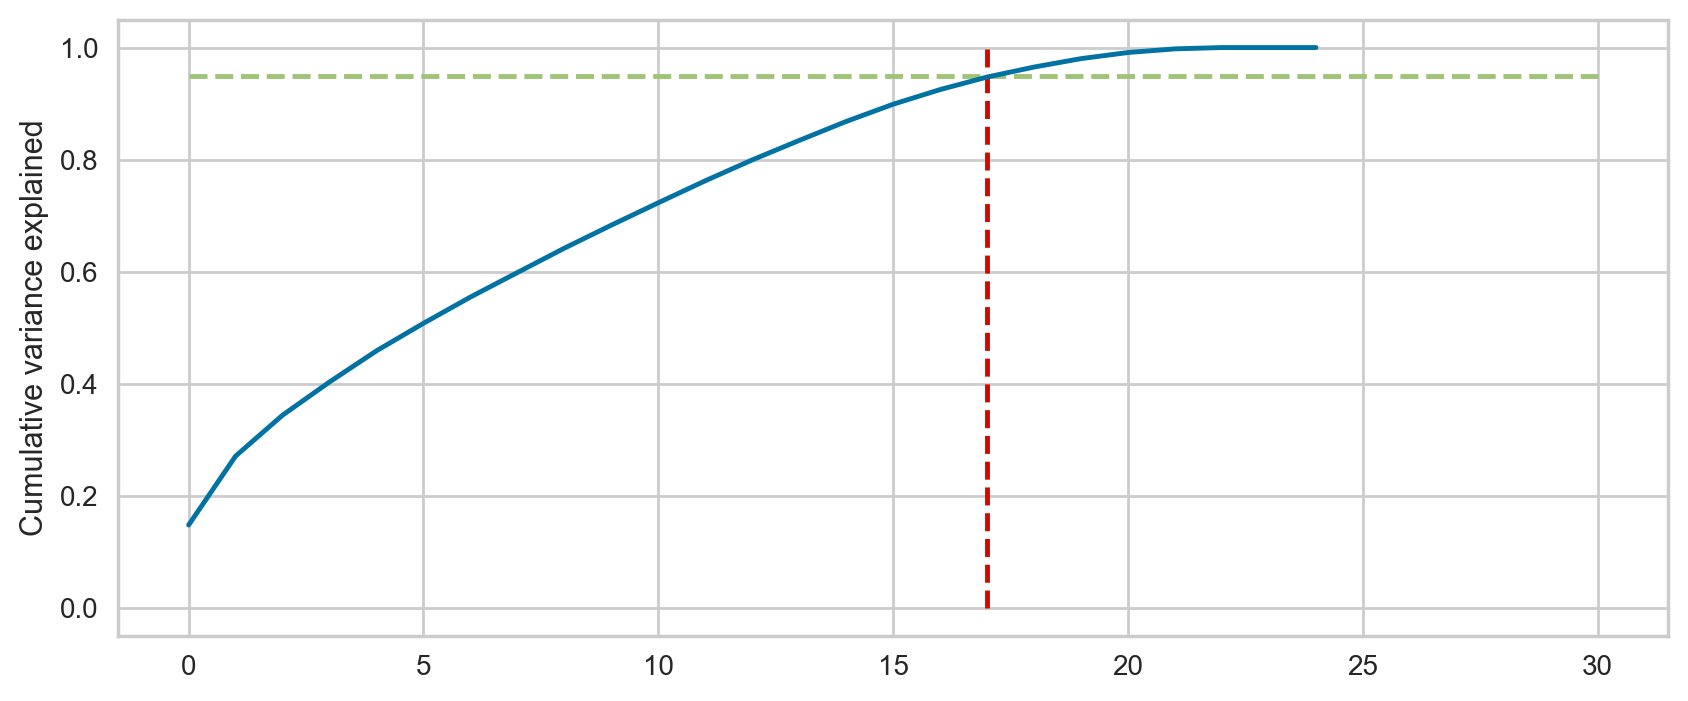

In [392]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=17, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [393]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)
X_pca_final = pca_final.fit_transform(X_scaled_df)

In [394]:
print(X_scaled_df.shape)
print(X_pca_final.shape)

(39786, 25)
(39786, 17)


In [395]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [396]:
corrmat.shape

(17, 17)

<Axes: >

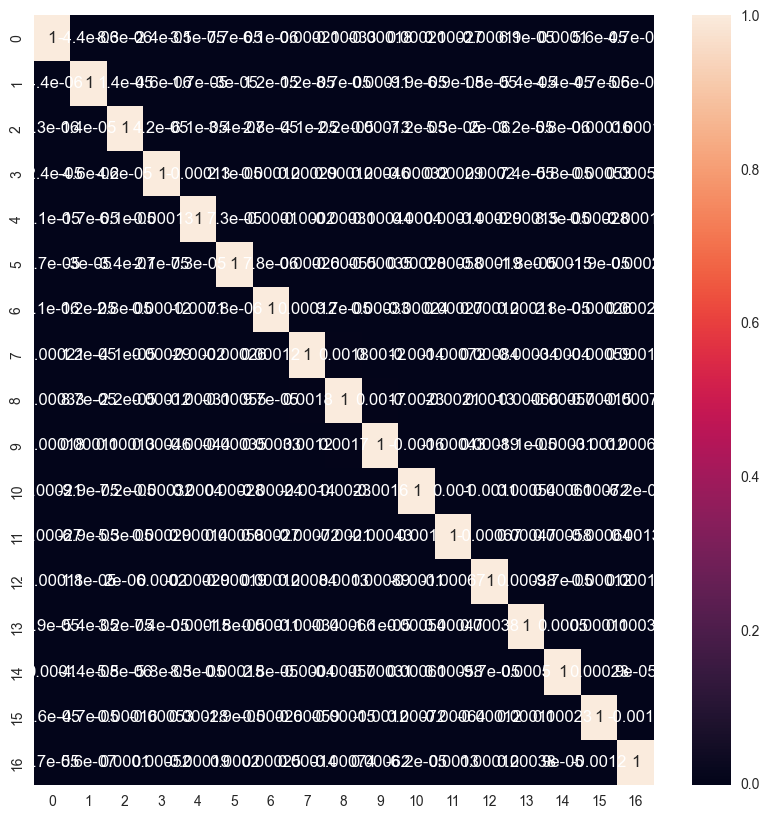

In [397]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [398]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

,PC1,PC2,Feature
0,0.315296,0.127959,loan_amnt
1,0.179209,0.230467,credit_month
2,0.101534,0.519868,int_rate
3,0.201935,-0.073532,emp_length
4,0.330368,-0.043657,annual_inc


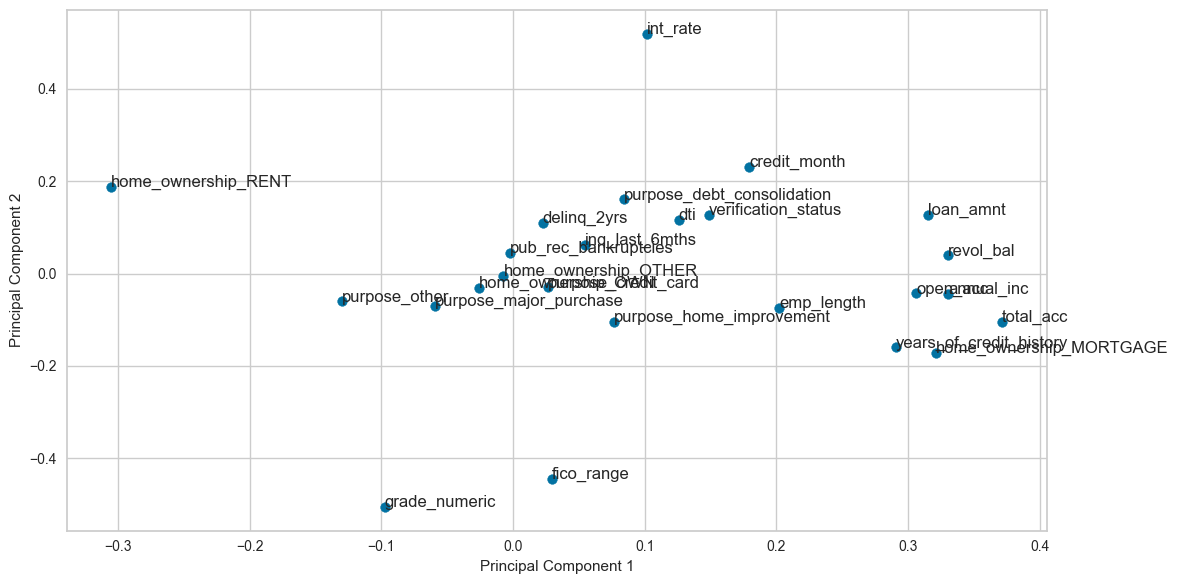

In [399]:
fig = plt.figure(figsize = (12,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

 Wytrenowanie tych samych modeli na skompresowanych danych

In [400]:
# Podzial danych na treningowe i testowe
x_train, x_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.3, random_state=0)

In [401]:
model1_pca = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model1_pca.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [402]:
acc_BC = model1_pca.score(x_test, y_test)
acc_BC_t = model1_pca.score(x_train, y_train)

In [403]:
roc_auc_score1 = metrics.roc_auc_score(y_test, model1_pca.predict_proba(x_test)[:, 1])

In [404]:
results_pca = pd.DataFrame({'Method_PCA':['BaggingClassifier'], 'accuracy_test': acc_BC, 'accuracy_train': acc_BC_t, 'ROC_AUC_score': roc_auc_score1})
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.832021,0.99307,0.604657


In [405]:
model2_pca = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model2_pca.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [406]:
acc_xgb = model2_pca.score(x_test, y_test)
acc_xgb_t = model2_pca.score(x_train, y_train)

In [407]:
roc_auc_score2 = metrics.roc_auc_score(y_test, model2_pca.predict_proba(x_test)[:, 1])

In [408]:
tempResultsDf = pd.DataFrame({'Method_PCA':['XGBoost'], 'accuracy_test': acc_xgb, 'accuracy_train': acc_xgb_t, 'ROC_AUC_score': roc_auc_score2})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.832021,0.993070,0.604657
0,XGBoost,0.850620,0.861364,0.675971


In [409]:
model3_pca = LogisticRegression(solver = 'lbfgs')
model3_pca.fit(x_train, y_train)

LogisticRegression()

In [410]:
acc_LR = model3_pca.score(x_test, y_test)
acc_LR_t = model3_pca.score(x_train, y_train)

In [411]:
roc_auc_score3 = metrics.roc_auc_score(y_test, model3_pca.predict_proba(x_test)[:, 1])

In [412]:
tempResultsDf = pd.DataFrame({'Method_PCA':['LogisticRegression'], 'accuracy_test': acc_LR, 'accuracy_train': acc_LR_t, 'ROC_AUC_score': roc_auc_score3})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.832021,0.993070,0.604657
0,XGBoost,0.850620,0.861364,0.675971
0,LogisticRegression,0.851123,0.860036,0.688576


In [413]:
model4_pca = AdaBoostClassifier(random_state=1)
model4_pca.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [414]:
acc_ada = model4_pca.score(x_test, y_test)
acc_ada_t = model4_pca.score(x_train, y_train)

In [415]:
roc_auc_score4 = metrics.roc_auc_score(y_test, model4_pca.predict_proba(x_test)[:, 1])

In [416]:
tempResultsDf = pd.DataFrame({'Method_PCA':['AdaBoostClassifier'], 'accuracy_test': acc_ada, 'accuracy_train': acc_ada_t, 'ROC_AUC_score': roc_auc_score4})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.832021,0.993070,0.604657
0,XGBoost,0.850620,0.861364,0.675971
0,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.850704,0.859785,0.685474


In [417]:
model5_pca = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model5_pca.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [418]:
acc_GB = model5_pca.score(x_test, y_test)
acc_GB_t = model5_pca.score(x_train, y_train)

In [419]:
roc_auc_score5 = metrics.roc_auc_score(y_test, model5_pca.predict_proba(x_test)[:, 1])

In [420]:
tempResultsDf = pd.DataFrame({'Method_PCA':['GradientBoostingClassifier'], 'accuracy_test': acc_GB, 'accuracy_train': acc_GB_t, 'ROC_AUC_score': roc_auc_score5})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.832021,0.993070,0.604657
0,XGBoost,0.850620,0.861364,0.675971
0,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.850704,0.859785,0.685474
0,GradientBoostingClassifier,0.850871,0.860323,0.667296


In [421]:
model6_pca = RandomForestClassifier()
model6_pca.fit(x_train, y_train)

RandomForestClassifier()

In [422]:
acc_RF = model6_pca.score(x_test, y_test)
acc_RF_t = model6_pca.score(x_train, y_train)

In [423]:
roc_auc_score6 = metrics.roc_auc_score(y_test, model6_pca.predict_proba(x_test)[:, 1])

In [424]:
tempResultsDf = pd.DataFrame({'Method_PCA':['RandomForestClassifier'], 'accuracy_test': acc_RF, 'accuracy_train': acc_RF_t, 'ROC_AUC_score': roc_auc_score6})
results_pca = pd.concat([results_pca, tempResultsDf])
results_pca = results_pca[['Method_PCA', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_pca

,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.832021,0.993070,0.604657
0,XGBoost,0.850620,0.861364,0.675971
0,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.850704,0.859785,0.685474
0,GradientBoostingClassifier,0.850871,0.860323,0.667296
0,RandomForestClassifier,0.850452,1.000000,0.660154


In [425]:
results_compare = pd.concat([results, results_pca], axis=1)
results_compare

,Method,accuracy_test,accuracy_train,ROC_AUC_score,Method_PCA,accuracy_test,accuracy_train,ROC_AUC_score
0,BaggingClassifier,0.829088,0.992172,0.624849,BaggingClassifier,0.832021,0.993070,0.604657
0,XGBoost,0.858244,0.857594,0.681375,XGBoost,0.850620,0.861364,0.675971
0,LogisticRegression,0.857741,0.857092,0.689967,LogisticRegression,0.851123,0.860036,0.688576
0,AdaBoostClassifier,0.857406,0.856984,0.691030,AdaBoostClassifier,0.850704,0.859785,0.685474
0,GradientBoostingClassifier,0.858328,0.857127,0.676708,GradientBoostingClassifier,0.850871,0.860323,0.667296
0,RandomForestClassifier,0.856652,0.999964,0.678093,RandomForestClassifier,0.850452,1.000000,0.660154


Wybranie jednego modelu (na podstawie AUROC) i jego analiza

Model 3 - Regresja Logistyczna

In [471]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

In [472]:
model_final = LogisticRegression( solver='liblinear')
model_final.fit(x_train, y_train)
roc_auc_score = metrics.roc_auc_score(y_test, model_final.predict_proba(x_test)[:, 1])
roc_auc_score

0.6899678745946083

 Walidacja Krzyżowa

In [473]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [474]:
scores_acc = cross_val_score(model_final, x_train, y_train, cv=kfold, scoring="accuracy")
scores_roc = cross_val_score(model_final, X_scaled_df, y, cv=kfold, scoring='roc_auc')

print('Mean Accuracy:%.3f' % mean(scores_acc))
print('Mean ROC AUC: %.3f' % mean(scores_roc))

Mean Accuracy:0.857
Mean ROC AUC: 0.688


In [466]:
for num_folds in [2,5,10,15,25,50,100,500]:
    kfold = KFold(n_splits=num_folds)
    scores = cross_val_score(model_final, X_scaled_df, y, scoring='roc_auc', cv=kfold)
    print('Mean ROC AUC for', num_folds,'folds: %.3f' % mean(scores))

Mean ROC AUC for 2 folds: 0.686
Mean ROC AUC for 5 folds: 0.687
Mean ROC AUC for 10 folds: 0.688
Mean ROC AUC for 15 folds: 0.689
Mean ROC AUC for 25 folds: 0.689
Mean ROC AUC for 50 folds: 0.689
Mean ROC AUC for 100 folds: 0.689
Mean ROC AUC for 500 folds: 0.690


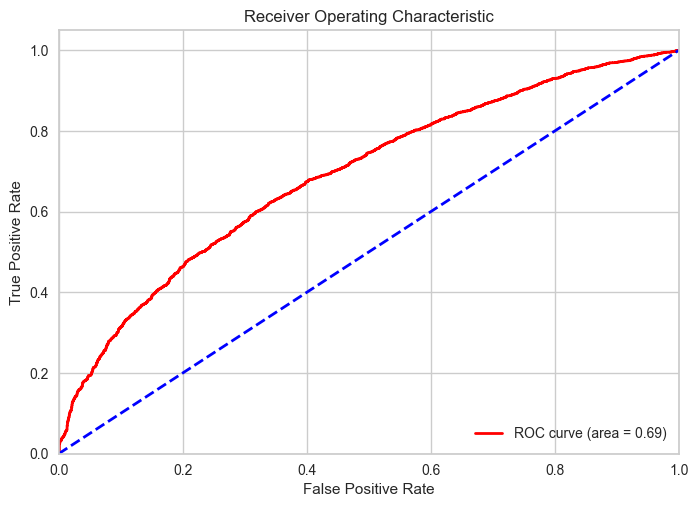

In [467]:
y_prob = model_final.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="red", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="blue", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

 Feature Importance - istotność cech

C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\maryn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


<bound method Visualizer.show of FeatureImportances(ax=<Axes: >,
                   estimator=LogisticRegression(solver='liblinear'),
                   relative=False)>

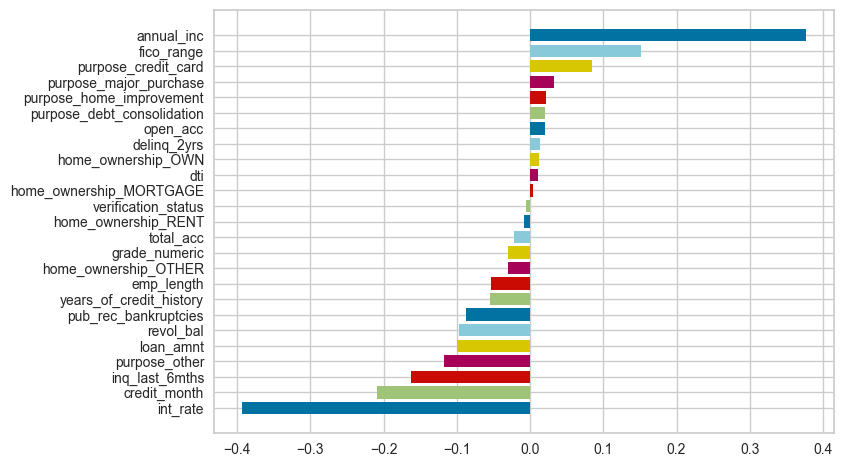

In [475]:
f_imp = FeatureImportances(model_final, relative=False)
f_imp.fit(X_scaled_df, y)
f_imp.show

Cechy na podstawie których model podejmuje decyzje wydają się jak najbardziej być uzasadnione.

## GridSearchCV - metoda dostrajania hiperparametrów

In [ ]:
param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3,3,7)
}

hip_par = GridSearchCV(model_final, param_grid, cv=kfold, scoring='roc_auc')
hip_par.fit(x_train, y_train)

best_params = hip_par.best_params_
best_model = hip_par.best_estimator_

In [487]:
print("ROC_AUC_score :",grid_search.best_score_)

ROC_AUC_score : 0.6924345569674554


In [488]:
print(best_model)
print(best_params)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [489]:
best_model.fit(x_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [490]:
acc_LR_hp = best_model.score(x_test, y_test)
acc_LR_t_hp = best_model.score(x_train, y_train)

In [491]:
roc_auc_score_final = metrics.roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

In [492]:
results_final = pd.DataFrame({'Method':['Logistic Regresion'], 'accuracy_test': acc_LR_hp, 'accuracy_train': acc_LR_t_hp, 'ROC_AUC_score': roc_auc_score_final})
results_final = results_final[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_final

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,Logistic Regresion,0.85816,0.857163,0.690278


Balansowanie klas z wykorzystaniem SMOTE

In [574]:
counter = Counter(y_train)
print(counter)

Counter({1: 23871, 0: 3979})


In [518]:
smote = SMOTE(random_state=42)

In [567]:
X_smote = X_scaled_df
Y = y

In [568]:
X_smote, Y = smote.fit_resample(X_smote, y)

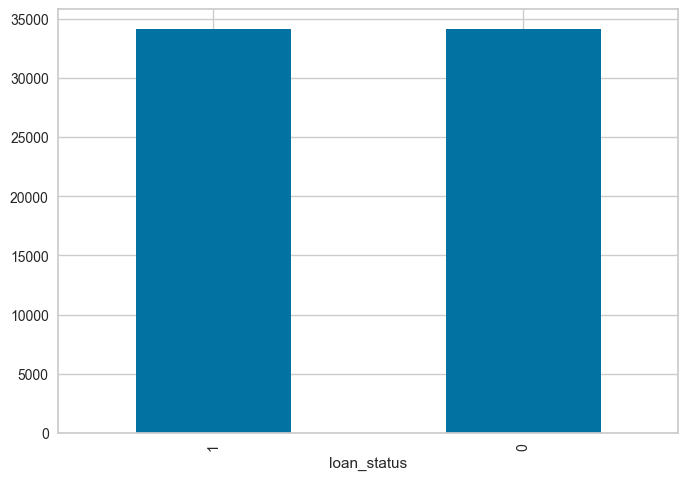

In [570]:
pd.Series(Y).value_counts().plot.bar()

In [572]:
counter = Counter(Y)
print(counter)

Counter({1: 34116, 0: 34116})


In [576]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, Y, test_size=0.30, random_state=42)

In [581]:
model_final_smote = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model_final_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [582]:
acc_LR_smote = model_final_smote.score(X_test_smote, y_test_smote)
acc_LR_t_smote = model_final_smote.score(X_train_smote, y_train_smote)

In [583]:
roc_auc_score_smote_final = metrics.roc_auc_score(y_test_smote, model_final_smote.predict_proba(X_test_smote)[:, 1])

In [585]:
results_final = pd.DataFrame({'Method':['Logistic Regresion'], 
                            'accuracy_test': acc_LR_smote, 
                            'accuracy_train': acc_LR_t_smote, 
                            'ROC_AUC_score': roc_auc_score_smote_final})
results_final = results_final[['Method', 'accuracy_test', 'accuracy_train', 'ROC_AUC_score']]
results_final

,Method,accuracy_test,accuracy_train,ROC_AUC_score
0,Logistic Regresion,0.645872,0.645848,0.699514
